#Unemployment Analysis with Python

My aim is to analyse the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. My project assigned by Oasis Infobyte is so clearly definable.
I imported the dataset from the company's pdf (kaggle), in which they provided with clear information about the Data values.

#Loading the libraries

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

#Loading Dataset

In [3]:
data=pd.read_csv('./Unemployment_Rate_upto_11_2020.csv')
data


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [4]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [5]:
data.columns= ["State","Dates","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]

#Data Cleaning

##1. Checking null values

In [6]:
data.isnull().sum()

State                                  0
Dates                                  0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
dtype: int64

By this we can conclude that there are no null values found.

##2.Checking the data type

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State                                267 non-null    object 
 1   Dates                                267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [8]:
type(data.iloc[2,1])

str

In [9]:
data.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


#Exploratory Data Analysis- Visualisation

In [10]:
data.State.unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

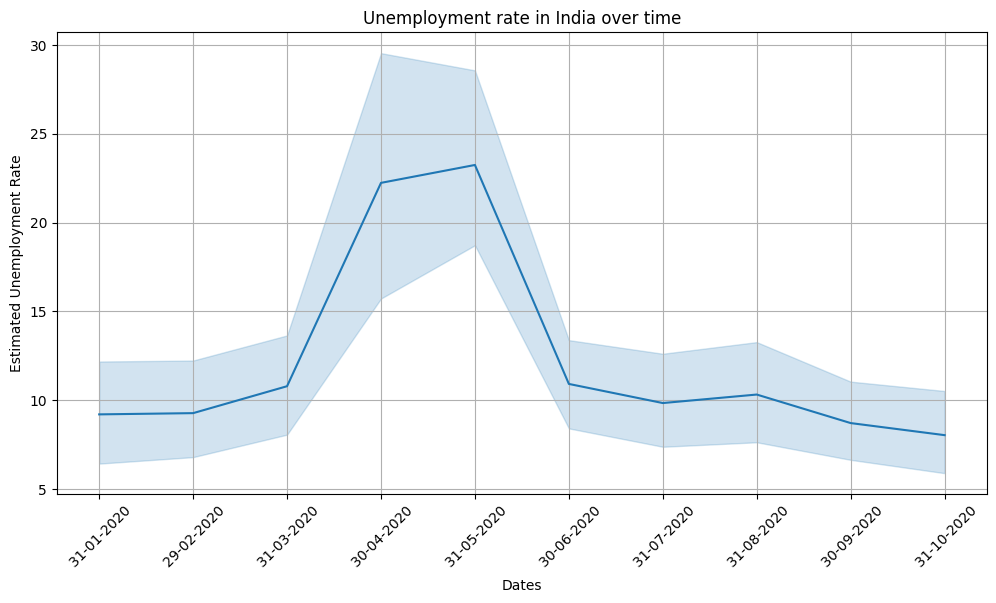

In [13]:
plt.figure(figsize=(12,6)) #unemployment rate over time
sns.lineplot(x=data.Dates,y=data['Estimated Unemployment Rate'])
plt.title("Unemployment rate in India over time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In India, the lockdown was first announced on 25th of march 2020. We see that unemployment rate had started to increase on that time. By the start of April the unemployment rate had increased significantly. The time period between May and June faced the highest unemployment rate in India. And by June unemployment rate started to fall down slowly and reached the normal unemployment rate by August.

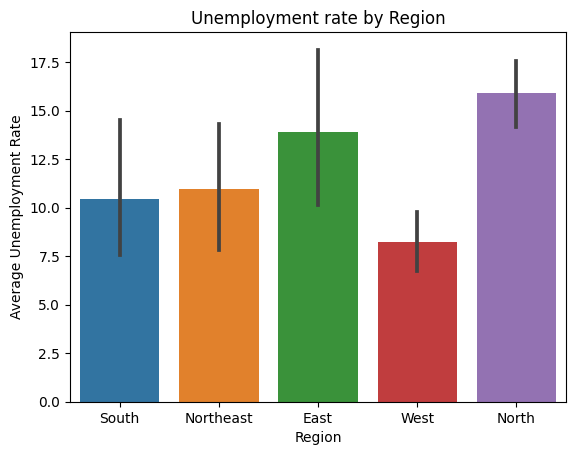

In [14]:
sns.barplot(data,x='Region',y='Estimated Unemployment Rate')
plt.xlabel("Region")
plt.ylabel('Average Unemployment Rate')
plt.title('Unemployment rate by Region')
plt.show()

In [16]:
data.groupby('Region')['Estimated Unemployment Rate'].mean().sort_values(ascending=False)

Region
North        15.889620
East         13.916000
Northeast    10.950263
South        10.454667
West          8.239000
Name: Estimated Unemployment Rate, dtype: float64

 we can say that North region has the highest unemployment rate compared to the West region which has the lowest unemployment rate

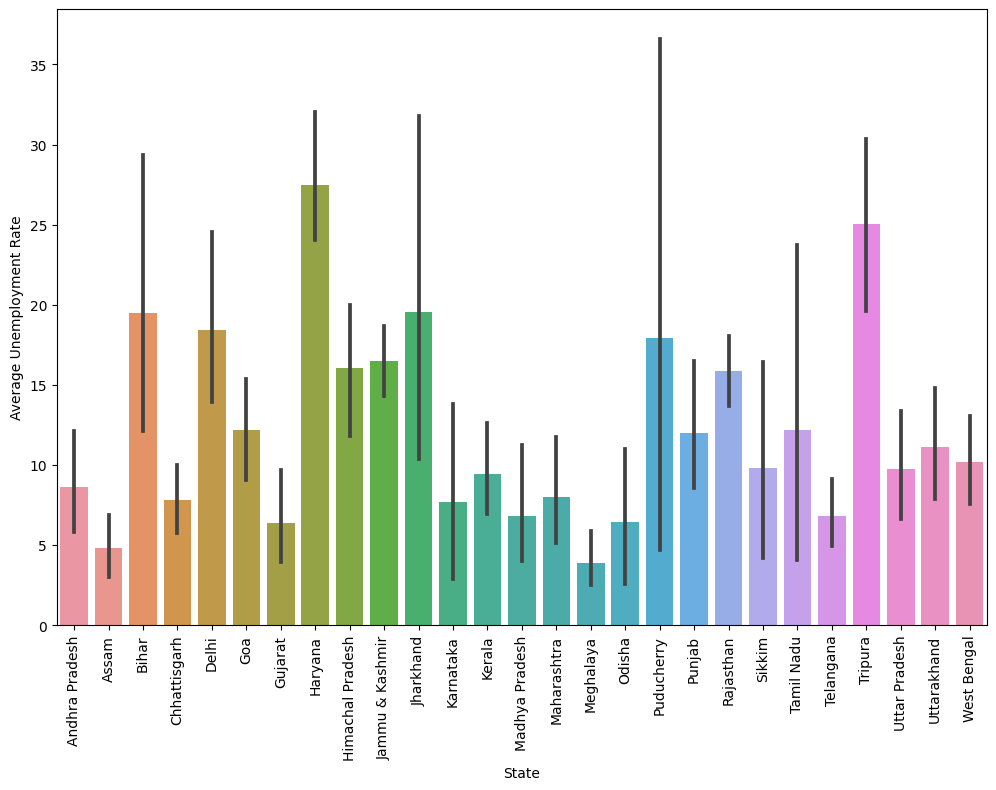

In [17]:
plt.figure(figsize=(12,8))  #unemployment by State wise
sns.barplot(data,x='State',y='Estimated Unemployment Rate')
plt.ylabel('Average Unemployment Rate')
plt.xticks(rotation=90)
plt.show()

By Data Visualisation, it is visible that Haryana and Tripura have the highest unemployment rate on comparing Meghalaya and Assam  which have the lowest unemployment rate

In [18]:
for region in list(data['Region'].unique()):  #Highest unemployed state in each region
    df=data[data['Region']==region]
    rate_by_states=df.groupby('State')['Estimated Unemployment Rate'].mean().sort_values(ascending=False)
    print(f'-> {rate_by_states.index[0]} has the highest unemployment rate of {rate_by_states[0]}% in {region} region.\n')

-> Puducherry has the highest unemployment rate of 17.942% in South region.

-> Tripura has the highest unemployment rate of 25.055% in Northeast region.

-> Jharkhand has the highest unemployment rate of 19.538999999999998% in East region.

-> Goa has the highest unemployment rate of 12.167% in West region.

-> Haryana has the highest unemployment rate of 27.476999999999997% in North region.



<Axes: xlabel='Dates', ylabel='Estimated Unemployment Rate'>

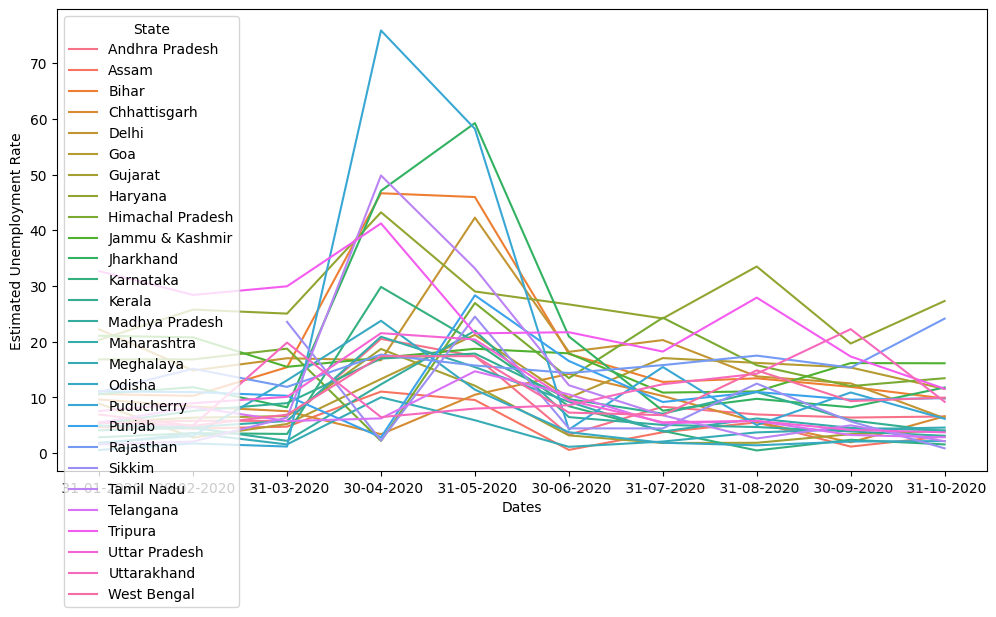

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(data,x='Dates',y='Estimated Unemployment Rate', hue='State')